# Load data and packages 

In [1]:
import geopandas as gp 
import numpy as np 
import pandas as pd
import glob 

## Test 1: Identifying issues on the temperature binary file

In [108]:
def read_bin(path):
    return np.fromfile(path,
                       dtype=np.dtype([('lid', np.int32),
                                       ('val', np.float32)]) ,
                       offset=4,)   
def read_from_rec(path, pos):
    f = open(path,'r')
    l = f.readlines()
    f.close()
    lids = np.array([int(i) for i in l[4::2]])
    var = np.array([float(i.split()[pos]) for i in l[5::2]])
    return lids, var

In [383]:
f = open('../local_data/tables/state_mrms_1701381600.rec','r')
l = f.readlines()
f.close()

In [384]:
s = np.array([np.array(i.split()).astype(float) for i in l[5::2]])

In [385]:
s = s.T

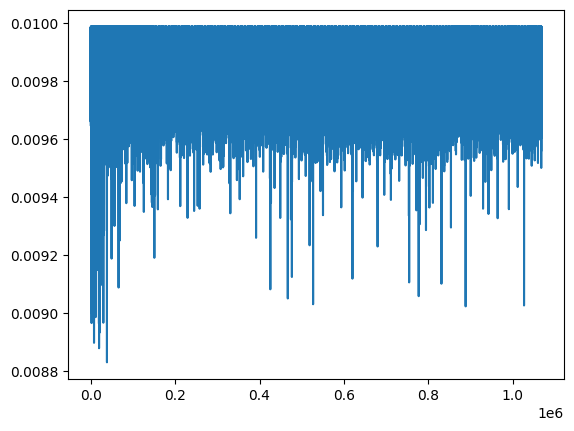

In [390]:
pl.plot(s[2][s[2]<0.1])

## Reading files 

In [266]:
#Read recs from the operational model 
lids, t1 = read_from_rec('../local_data/tables/state_mrms_1701360000.rec', -1)

#Read luts for the temperature 
lut = np.load('../local_data/luts/lut_ndfd.npy')

#Read binary file 
binf = read_bin('../local_data/tables/1701396000')

In [128]:
lids_zero = lids[np.where(t1 == 0)]

In [409]:
# lids, t1 = read_from_rec('../local_data/tables/state_mrms_1701378000.rec', 2) # bussniess as usual
# lids, t2 = read_from_rec('../local_data/tables/state_mrms_1701381600.rec', 2) # No added snowmelt to the ponded
lids, t3 = read_from_rec('../local_data/tables/state_mrms_1701385200.rec', 4) # No frozen ground
lids, t4 = read_from_rec('../local_data/tables/state_mrms_1701388800.rec', 4) # Ground is frozen in function of prain

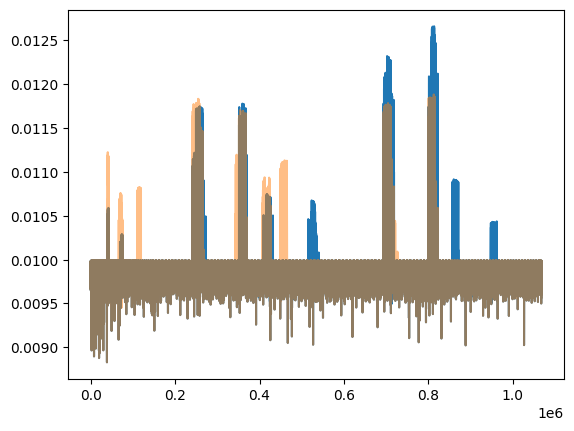

In [401]:
#pl.plot(t1[t1<0.1])
pl.plot(t4[t4<0.1])
pl.plot(t3[t3<0.1], alpha = 0.5)
#pl.ylim(0,0.006)

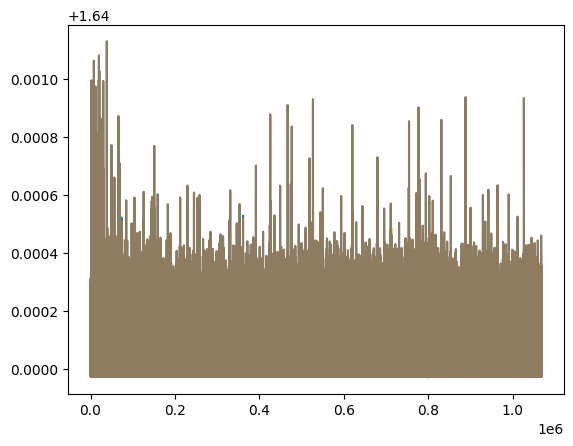

In [404]:
pl.plot(t4[t4 < 1.65])
pl.plot(t3[t3 < 1.65], alpha = 0.5)

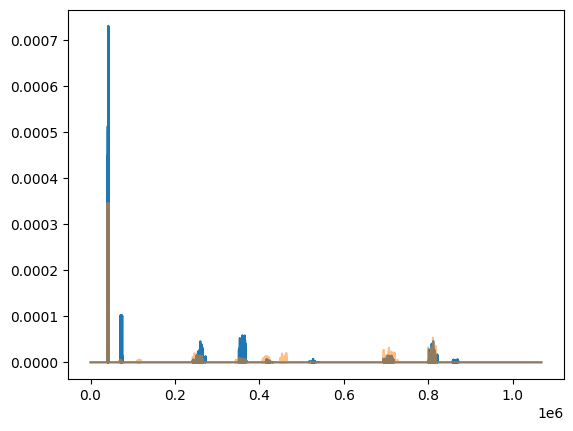

In [410]:
pl.plot(t4)
pl.plot(t3, alpha = 0.5)

In [411]:
f = open('../local_data/tables/temp_pond2.txt','w')
f.write('lid, val\n')
for lid, val in zip(lids, t4):
    f.write('%d, %.4f\n' % (lid, val))
f.close()

In [267]:
f = open('../local_data/tables/temp_pond.txt','w')
f.write('lid, val\n')
for lid, val in zip(binf['lid'], binf['val']):
    f.write('%d, %.4f\n' % (lid, val))
f.close()

In [268]:
binf['val']

array([0.6000001 , 0.49275476, 0.20331872, ..., 0.5       , 0.24385582,
       0.5       ], dtype=float32)

In [103]:
temp[temp == 0].shape

(118,)

In [87]:
np.unique(temp)

array([ 0., 62.])

In [78]:
temp

array([1.155378e+28, 1.155378e+28, 1.155378e+28, ..., 1.123395e+28,
       1.135960e+28, 1.123395e+28])

In [23]:
temp_i = temp.astype(int)

In [27]:
temp.size

1067890

In [40]:
a = d['val']

In [44]:
lids = d['lid']

In [68]:
a

array([-0.0499939 ,  1.9915802 ,  0.47643852, ..., -0.9747828 ,
       -0.9747828 , -0.9747828 ], dtype=float32)

In [46]:
w = pd.read_parquet('../local_data/tables/links_ifis_w_downstream.gz')

In [49]:
w.set_index('LINKNO', inplace = True)

In [52]:
idx = w.index.intersection(lids)

In [104]:
lut = np.load('../local_data/luts/lut_ndfd.npy')

In [107]:
np.where(lut['lid'] == 1905729)

(array([1946398]),)

In [72]:
lids.shape

(1281343,)

In [73]:
np.unique(lids).shape

(1281343,)

In [57]:
a[a<0].shape

(1113082,)